<a href="https://colab.research.google.com/github/IslamMohamedElzohery/Online_retail_analysis/blob/main/Online__Retail_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Data Preprocessing

#####import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

##### download required dataset in colab


In [2]:
!wget "https://archive.ics.uci.edu/static/public/352/online+retail.zip"

--2024-10-15 14:39:52--  https://archive.ics.uci.edu/static/public/352/online+retail.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘online+retail.zip’

online+retail.zip       [          <=>       ]  22.62M  3.48MB/s    in 7.4s    

2024-10-15 14:40:02 (3.06 MB/s) - ‘online+retail.zip’ saved [23715478]



##### unzip the dataset file

In [3]:
!unzip "online+retail.zip"

Archive:  online+retail.zip
 extracting: Online Retail.xlsx      


#####Transform Excel File to DataFrame Online_retail

In [4]:
online_retail=pd.read_excel('/content/Online Retail.xlsx')


##### Make A copy for Dataframe For Analysis

In [74]:
df_cpy=online_retail.copy() # we make copy for Analysis

##### Make some Aggregations for Numeric columns

In [75]:
df_cpy.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


the min unit price is negtive so that's illogical so it's typo mistake we need to further investigation for it , also the quantity coluumn the min is -ve so we need further investigation





##### identify the columns datatypes and find null content

In [29]:
df_cpy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


##### Transform negative Values  to postive for Quantity,UnitPrice and remove duplicates

In [76]:
df_cpy[['Quantity','UnitPrice']]=df_cpy[['Quantity','UnitPrice']].abs()
df_cpy[['Quantity','UnitPrice']].describe()
df_cpy=df_cpy.drop_duplicates() # to remove duplicates
df_cpy

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


then after investigation we've found it's typo for -ve sign so we make absloute value to get postive value from it after that we've found min unit price is zero so we need futrther investigation for it



#####Find total orders for products that have Unitprice=0 and CustomerID is Null

In [77]:
zero_price=df_cpy.query('UnitPrice==0') #to filter only unitPirce =0
zero_price_null_cust=zero_price[zero_price['CustomerID'].isna()==True] #to filter only customerID is Null
null_customer_null_price=zero_price_null_cust.groupby('Description',as_index=False)['InvoiceNo'].count().sort_values(by='InvoiceNo',ascending=False)
null_customer_null_price.rename(columns={'InvoiceNo':'No_of_orders','Description':'Product_name'},inplace=True) # to rename the column inoviceNo to no_of_orders
null_customer_null_price

,Product_name,No_of_orders
238,check,159
3,?,47
248,damages,45
246,damaged,43
264,found,25
...,...,...
156,OOPS ! adjustment,1
158,PACK OF 12 LONDON TISSUES,1
159,PACK OF 6 BIRDY GIFT TAGS,1
160,PARTY METAL SIGN,1


after further investigation after group by product_name there's unit price=0 and customer Id=null this likely due to some errors and damages in stores warehouse,and after that we should provide these details for stakeholder.

#####Filter only where CustomerID Is Not Null

In [78]:
df_cpy=df_cpy[df_cpy['CustomerID'].isna()==False] # we filter for customer ID not null to used for further analysis
df_cpy

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


##### Create Column Cancelled From InvoiceNo

In [108]:
df_cpy['InvoiceNo']=df_cpy['InvoiceNo'].astype(str)
df_cpy['cancelled']=df_cpy['InvoiceNo'].str.contains('C') #creation new column as cancelled as if the first character in invoiceNo is C then Cancelled
df_cpy


<ipython-input-108-211eecfd95cf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cpy['InvoiceNo']=df_cpy['InvoiceNo'].astype(str)
<ipython-input-108-211eecfd95cf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cpy['cancelled']=df_cpy['InvoiceNo'].str.contains('C') #creation new column as cancelled as if the first character in invoiceNo is C then Cancelled


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,cancelled,month,year,day,weekday,hour,year_month,quarter,total_sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,False,12,2010,1,Wednesday,8,2010-12-01,2010Q4,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,False,12,2010,1,Wednesday,8,2010-12-01,2010Q4,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,False,12,2010,1,Wednesday,8,2010-12-01,2010Q4,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,False,12,2010,1,Wednesday,8,2010-12-01,2010Q4,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,False,12,2010,1,Wednesday,8,2010-12-01,2010Q4,20.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,False,12,2011,9,Friday,12,2011-12-01,2011Q4,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,False,12,2011,9,Friday,12,2011-12-01,2011Q4,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,False,12,2011,9,Friday,12,2011-12-01,2011Q4,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,False,12,2011,9,Friday,12,2011-12-01,2011Q4,16.60


#####Create Multiple Columns dervied From InvoiceDate like Month, Year, Quarter....etc

In [80]:
df_cpy['month']=df_cpy['InvoiceDate'].dt.month
df_cpy['year']=df_cpy['InvoiceDate'].dt.year
df_cpy['day']=df_cpy['InvoiceDate'].dt.day
df_cpy['weekday']=df_cpy['InvoiceDate'].dt.weekday # it returns weekdays as 0  which =monday  etc
week_days={0:'Monday',1:'Tuesday',2:'Wednesday',3:'Thursday',4:'Friday',5:'Tuesday',6:'Sunday'} # to use in mapping to create weekday column from numerical to actual week names
df_cpy['weekday']=df_cpy['weekday'].map(week_days)
df_cpy['hour']=df_cpy['InvoiceDate'].dt.hour
df_cpy['year_month']=df_cpy['InvoiceDate'].dt.to_period('M') # create column month with the year countinous data
df_cpy['quarter']=df_cpy['InvoiceDate'].dt.to_period('Q') # to create quarter

df_cpy['year_month']=df_cpy['year_month'].dt.to_timestamp() #to change year month column to timestamp data type

df_cpy

<ipython-input-80-d95ac05eb59a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cpy['month']=df_cpy['InvoiceDate'].dt.month
<ipython-input-80-d95ac05eb59a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cpy['year']=df_cpy['InvoiceDate'].dt.year
<ipython-input-80-d95ac05eb59a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,cancelled,month,year,day,weekday,hour,year_month,quarter
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,False,12,2010,1,Wednesday,8,2010-12-01,2010Q4
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,False,12,2010,1,Wednesday,8,2010-12-01,2010Q4
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,False,12,2010,1,Wednesday,8,2010-12-01,2010Q4
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,False,12,2010,1,Wednesday,8,2010-12-01,2010Q4
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,False,12,2010,1,Wednesday,8,2010-12-01,2010Q4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,False,12,2011,9,Friday,12,2011-12-01,2011Q4
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,False,12,2011,9,Friday,12,2011-12-01,2011Q4
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,False,12,2011,9,Friday,12,2011-12-01,2011Q4
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,False,12,2011,9,Friday,12,2011-12-01,2011Q4


##### Create Total_sales(Revenue) Column

In [81]:
df_cpy['total_sales']=df_cpy["UnitPrice"]*df_cpy["Quantity"] #create column for total_sales
df_cpy

<ipython-input-81-41c0663981d8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cpy['total_sales']=df_cpy["UnitPrice"]*df_cpy["Quantity"] #create column for total_sales


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,cancelled,month,year,day,weekday,hour,year_month,quarter,total_sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,False,12,2010,1,Wednesday,8,2010-12-01,2010Q4,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,False,12,2010,1,Wednesday,8,2010-12-01,2010Q4,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,False,12,2010,1,Wednesday,8,2010-12-01,2010Q4,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,False,12,2010,1,Wednesday,8,2010-12-01,2010Q4,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,False,12,2010,1,Wednesday,8,2010-12-01,2010Q4,20.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,False,12,2011,9,Friday,12,2011-12-01,2011Q4,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,False,12,2011,9,Friday,12,2011-12-01,2011Q4,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,False,12,2011,9,Friday,12,2011-12-01,2011Q4,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,False,12,2011,9,Friday,12,2011-12-01,2011Q4,16.60


# Data Analysis


#####Total orders per hour

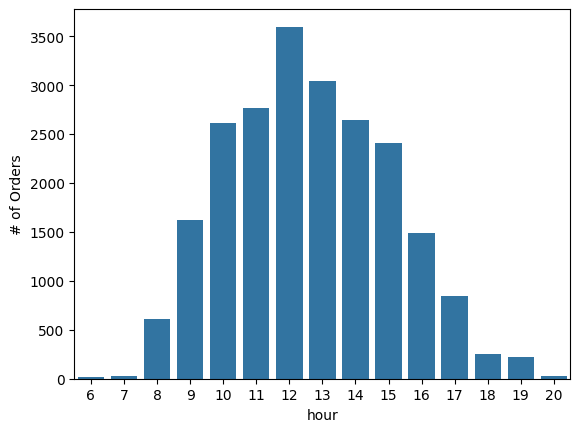

In [55]:
df_order_per_hour=df_cpy.groupby('hour')['InvoiceNo'].nunique().reset_index().sort_values(by='InvoiceNo',ascending=False)
sns.barplot(data=df_order_per_hour,x='hour',y='InvoiceNo')
plt.ylabel('# of Orders')
plt.show()

so with grouping with hour and count unique invoice we've found that's the most ordered time in 10 am to 15 pm  espically in 12 pm as the most ordered time slot

#####Top customers make orders

In [87]:
total_orders_per_customer=df_cpy.groupby('CustomerID',as_index=False)['InvoiceNo'].nunique().sort_values(by="InvoiceNo",ascending=False)
total_orders_per_customer.rename(columns={'InvoiceNo':'No_of_orders'},inplace=True)
total_orders_per_customer

,CustomerID,No_of_orders
1895,14911.0,248
330,12748.0,224
4042,17841.0,169
1674,14606.0,128
568,13089.0,118
...,...,...
1141,13877.0,1
2997,16400.0,1
1142,13878.0,1
1149,13886.0,1


#####Top customers make revenue

In [59]:
df_cpy.groupby('CustomerID',as_index=False)['total_sales'].sum().sort_values(by='total_sales',ascending=False).head(10)


,CustomerID,total_sales
3033,16446.0,336942.10
1703,14646.0,280923.02
4233,18102.0,262876.11
3758,17450.0,201459.41
1895,14911.0,154963.61
0,12346.0,154367.20
55,12415.0,126103.61
1345,14156.0,121205.57
2722,16029.0,108532.99
3801,17511.0,93999.38


also i reccommend to create loyality program for the top customer to recurring purchasing from us like the customer 14911.0 who ordered 248 times also for the most buyers from our stores like customer 16446.0


##### Number Of Orders per Weekday

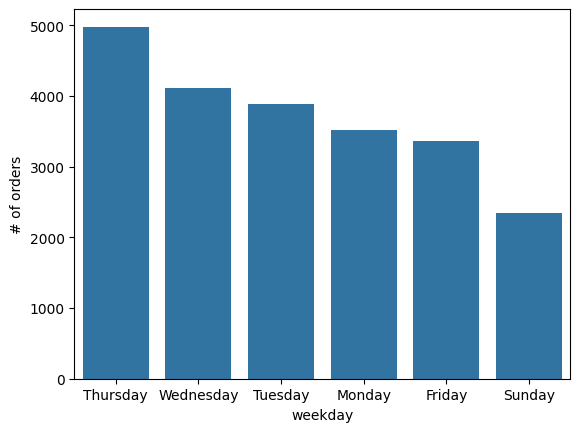

In [60]:
df_unique_orders_by_weekday=df_cpy.groupby('weekday')['InvoiceNo'].nunique().reset_index().sort_values(by='InvoiceNo',ascending=False) # grouping the data by weekday then count the unique ordres
sns.barplot(data=df_unique_orders_by_weekday,x='weekday',y='InvoiceNo')
plt.ylabel('# of orders')
plt.show()

##### Top products make revenue

by this barplot we should manage schedule and capacity for wharehouse's team and all involved employees to make sure no order is delayed by staff shortage or due to high order levels to imporve customer satisfaction

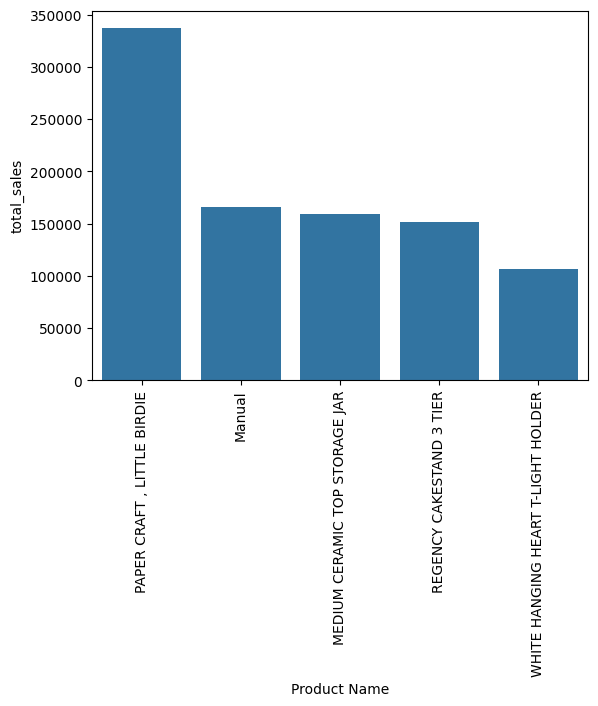

In [68]:
df_products=df_cpy.groupby(['Description'])['total_sales'].sum().reset_index().sort_values(by='total_sales',ascending=False).head(5) ## top 5 selling products
sns.barplot(data=df_products,x='Description',y='total_sales')
plt.xlabel('Product Name')
plt.xticks(rotation=90)
plt.show()

#####Top selling Products by Total Quantity

In [107]:
df_products=df_cpy.groupby(['Description']).agg({'Quantity':'sum','InvoiceNo':'count'}).reset_index().sort_values(by='Quantity',ascending=False) ## top 10 selling products
df_products.rename(columns={'InvoiceNo':'No_of_orders'},inplace=True)
df_products.head(10)

,Description,Quantity,No_of_orders
2329,"PAPER CRAFT , LITTLE BIRDIE",161990,2
2002,MEDIUM CERAMIC TOP STORAGE JAR,152410,208
3805,WORLD WAR 2 GLIDERS ASSTD DESIGNS,55519,477
1771,JUMBO BAG RED RETROSPOT,47193,1659
3716,WHITE HANGING HEART T-LIGHT HOLDER,39284,2058
217,ASSORTED COLOUR BIRD ORNAMENT,35311,1405
2279,PACK OF 72 RETROSPOT CAKE CASES,33954,1062
2612,POPCORN HOLDER,31346,689
2669,RABBIT NIGHT LIGHT,27261,838
2057,MINI PAINT SET VINTAGE,26272,335


##### Trends of total sales during the year

Text(0.5, 1.0, 'total_sales over month')

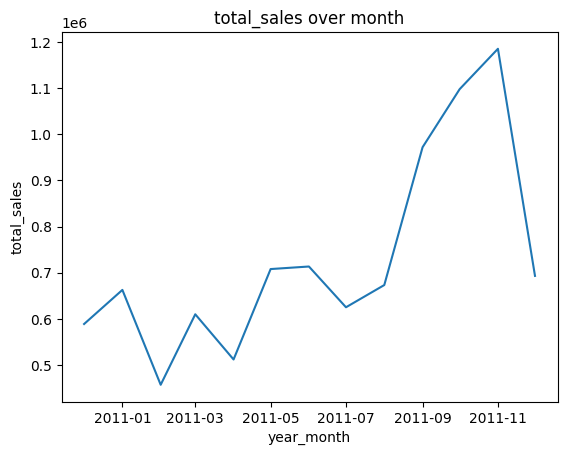

In [71]:
sales_per_year=df_cpy.groupby('year_month')['total_sales'].sum().reset_index()  #total sales per year
sns.lineplot(data=sales_per_year,x='year_month',y='total_sales')
plt.title("total_sales during the year")

##### Total Sales Per Quarter

In [65]:
top_quarter=df_cpy.groupby('quarter')['total_sales'].sum().reset_index().sort_values(by='total_sales',ascending=False) #we have to remove 2010Q4 as it's only has one month
top_quarter['quarter']=top_quarter['quarter'].astype(str) #change to string to use this column to filter with
top_quarter.query('quarter!="2010Q4"') # to filter all columns except 2010Q4

,quarter,total_sales
4,2011Q4,2976416.120
3,2011Q3,2269861.643
2,2011Q2,1932454.201
1,2011Q1,1728693.800


so increase in sales in last months of the year starting from 10 to 12 and decrease very steeply from 1 to 2  

#####Total sales Percent per Country

In [66]:
top_country=df_cpy.groupby('Country')['total_sales'].sum().reset_index().sort_values(by='total_sales',ascending=False).head(5) #top 5 country sales
top_country['sales_percent']=(top_country['total_sales']/df_cpy['total_sales'].sum())*100 #to calculate Total sales share per country
top_country['sales_percent']=top_country['sales_percent'].round(2).astype(str)+'%' # to add % and round the percent to 2 decimals in column sales_percent
top_country


,Country,total_sales,sales_percent
35,United Kingdom,7822893.134,82.38%
23,Netherlands,286231.140,3.01%
10,EIRE,280523.140,2.95%
14,Germany,235847.330,2.48%
13,France,221242.570,2.33%


as we can see the most of sales comes from UK as 82%

####Trends of Cancellation during the year per weekday

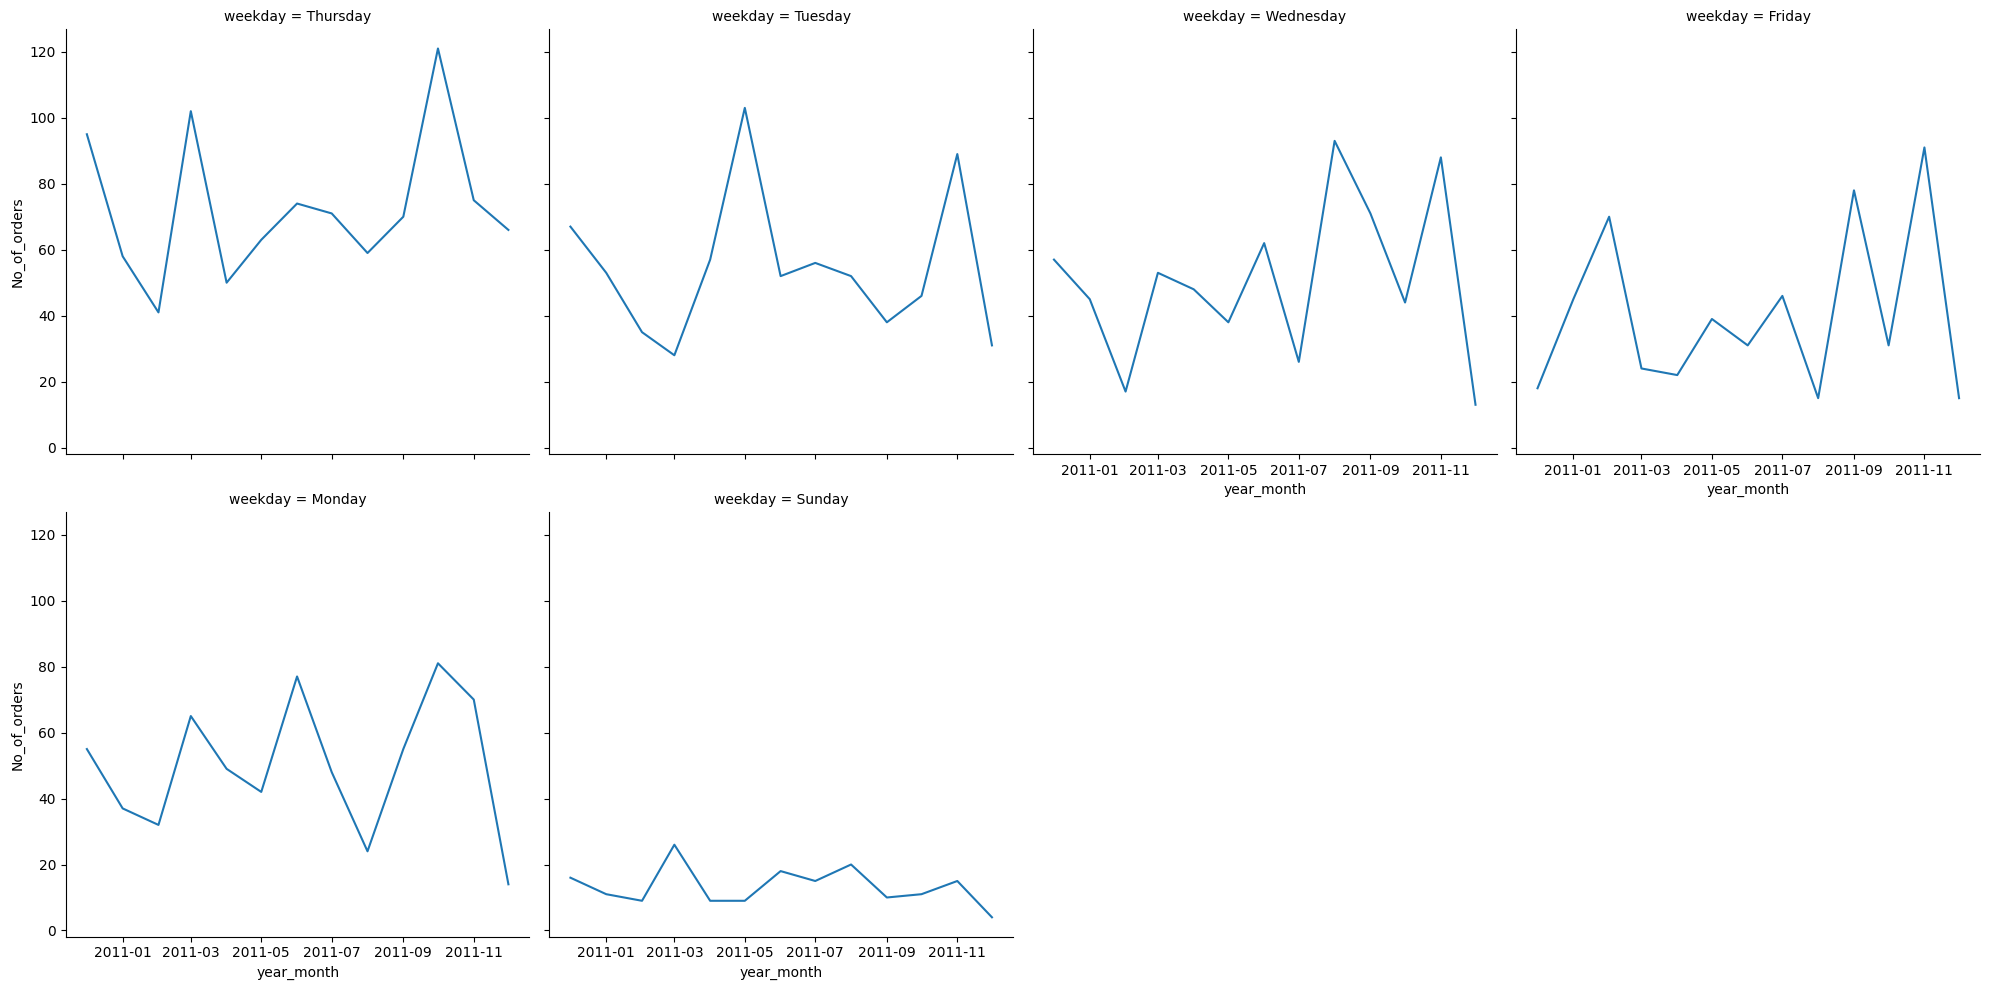

In [98]:
cancelled_orderes=df_cpy.groupby(['year_month','cancelled','weekday'],as_index=False)['InvoiceNo'].nunique().sort_values(by='InvoiceNo',ascending=False).query('cancelled==True') # this to calculate the number of orders that's has been canceled during year and every day
cancelled_orderes
figure1=sns.relplot(data=cancelled_orderes,x='year_month',y='InvoiceNo',col='weekday',kind='line',col_wrap=4) #we plot the trend of cancellation during the year for every day to find the most days that has high volume of cancellation
for fig in figure1.axes.flat:
  fig.set_ylabel('No_of_orders') #to rename y axis
plt.show()

#### cancellation orders per customer

In [93]:
customer_cancelled=df_cpy.groupby(['CustomerID','cancelled'],as_index=False)["InvoiceNo"].nunique().sort_values(by='InvoiceNo',ascending=False)
customer_cancelled.rename(columns={"InvoiceNo":"No_of_orders"},inplace=True)
customer_cancelled.query('cancelled==True').head(10)

,CustomerID,cancelled,No_of_orders
2617,14911.0,True,47
5497,17841.0,True,45
2315,14606.0,True,35
2239,14527.0,True,31
3026,15311.0,True,27
4124,16422.0,True,24
796,13089.0,True,21
137,12471.0,True,19
1120,13408.0,True,19
1254,13534.0,True,18


there's some customers that's facing many cancellation

#Insights and Recommendations



1.   First we should communicate with stakeholders about Null Customers and unitPrices=0 and gain more info from them
2.   After further investigation after group by product_name there's unit price=0 and customer Id=null this due to some errors and damages in stores warehouse,and after that we should provide these details for stakeholder.
3.  recommending the stakeholders for the rush hours (high volume of orders) between 10 AM to 15 PM to ensure no delay for customers during the rush hours also for the peak days which is thursday, also during peak months which fourth Quarter.
4. recommending the stakeholders for creation loyalty programs for our Top customers who place the most orders and generate the most revenue to encourage them buying from us again .
5.recommending for providing the supply for high demand products and increase the marketing and discounts for low demand products
6. recommending for investigations for cancelled orders. why the cancelled orders increase in thursdays ? is it because low volume of stuffs? or is it in some issues in our workflow ? ,and also why some customers faced many canellations we need further investigations for it.


